In [46]:
#importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
#reading the dataset

df=pd.read_csv('manufacturing.csv')

In [48]:
df.head()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000


In [49]:
df.describe()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
count,3957.000000,3957.000000,3957.000000,3957.000000,3.957000e+03,3957.000000
mean,200.034704,14.815558,2955.321308,48127.183128,1.003645e+07,96.260179
std,58.135717,5.772040,1458.224940,23812.213513,7.599356e+06,12.992262
min,100.014490,5.003008,513.706875,10156.971955,9.999462e+05,1.000000
25%,150.871296,9.692984,1798.247303,27626.929091,3.433810e+06,99.941129
50%,198.603371,14.832557,2678.277782,44611.452164,7.833390e+06,99.999997
75%,251.366552,19.749680,3929.058261,67805.443846,1.588251e+07,100.000000
max,299.992804,24.999132,7365.018714,103756.181544,2.699783e+07,100.000000


In [50]:
df.info

<bound method DataFrame.info of       Temperature (°C)  Pressure (kPa)  Temperature x Pressure  \
0           209.762701        8.050855             1688.769167   
1           243.037873       15.812068             3842.931469   
2           220.552675        7.843130             1729.823314   
3           208.976637       23.786089             4970.736918   
4           184.730960       15.797812             2918.345014   
...                ...             ...                     ...   
3952        156.811578       21.794290             3417.596965   
3953        197.850406        8.291704             1640.516924   
3954        241.357144       16.391910             3956.304672   
3955        209.040239       23.809936             4977.234763   
3956        163.359996       24.332133             3974.897121   

      Material Fusion Metric  Material Transformation Metric  Quality Rating  
0               44522.217074                    9.229576e+06       99.999971  
1               6

In [51]:
#correlation

df.corr()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
Temperature (°C),1.000000,-0.024754,0.571743,0.974901,0.971210,-0.461279
Pressure (kPa),-0.024754,1.000000,0.773572,0.151095,-0.022862,0.013129
Temperature x Pressure,0.571743,0.773572,1.000000,0.694733,0.555579,-0.258474
Material Fusion Metric,0.974901,0.151095,0.694733,1.000000,0.976708,-0.511972
Material Transformation Metric,0.971210,-0.022862,0.555579,0.976708,1.000000,-0.575756
Quality Rating,-0.461279,0.013129,-0.258474,-0.511972,-0.575756,1.000000


<Axes: xlabel='Temperature (°C)', ylabel='Quality Rating'>

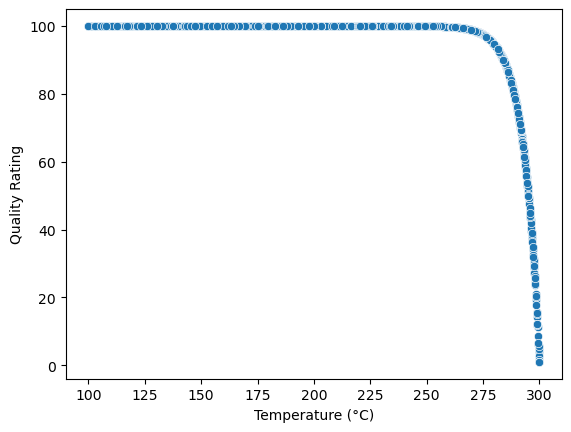

In [52]:
sns.scatterplot(x='Temperature (°C)',y='Quality Rating',data=df)



<Axes: xlabel='Pressure (kPa)', ylabel='Quality Rating'>

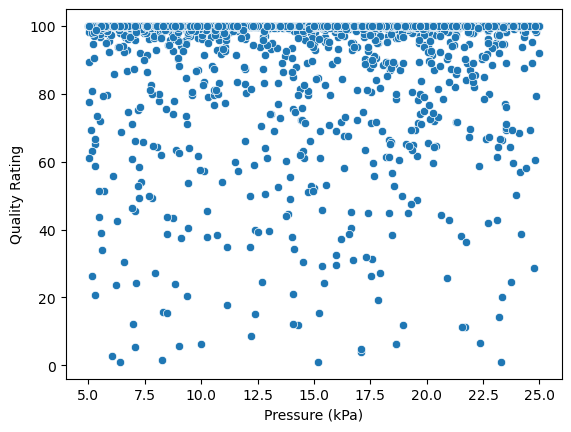

In [53]:
sns.scatterplot(x='Pressure (kPa)',y='Quality Rating',data=df)

<Axes: xlabel='Temperature x Pressure', ylabel='Quality Rating'>

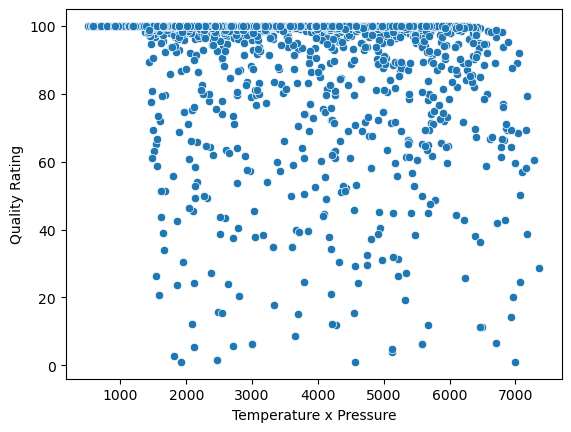

In [54]:
sns.scatterplot(x='Temperature x Pressure',y='Quality Rating',data=df)

<Axes: xlabel='Material Fusion Metric', ylabel='Quality Rating'>

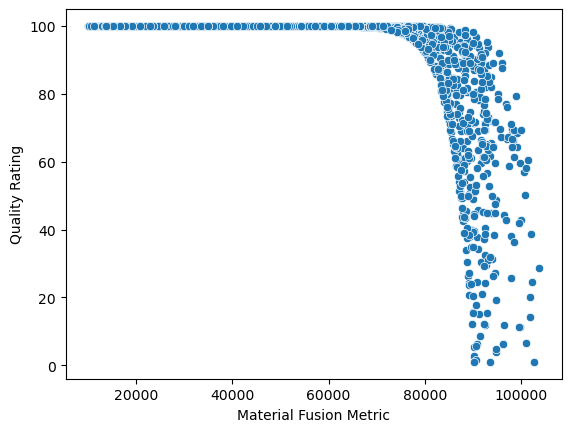

In [55]:
sns.scatterplot(x='Material Fusion Metric',y='Quality Rating',data=df)

<Axes: xlabel='Material Transformation Metric', ylabel='Quality Rating'>

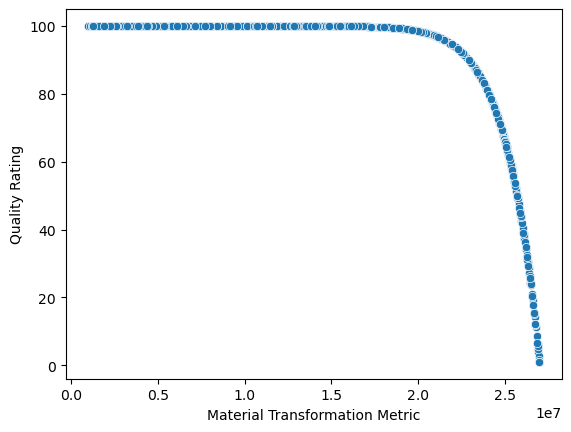

In [56]:
sns.scatterplot(x='Material Transformation Metric',y='Quality Rating',data=df)

In [57]:
#depenent and indepedent features:

X=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [58]:
#splitting the data:

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [59]:
#standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [80]:
X_train.shape


(3165, 5)

In [81]:

y_train.shape

(3165,)

In [71]:
#model fitting 

from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [72]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,X_train,y_train,scoring='r2',cv=3)

In [73]:
print(score)

In [74]:
#predictions 

y_pred=model.predict(X_test)

In [75]:
#metrics:

from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score

mse=mean_squared_error(y_pred,y_test)
mae=mean_absolute_error(y_pred,y_test)
r2_score=r2_score(y_pred,y_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)
print(r2_score)

99.10258097439213
5.668298035635623
9.955027924340149
-0.2360309831393934


In [102]:
#polynomial regression

from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=2,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [103]:
#metrics

from sklearn.metrics import r2_score
regression=LinearRegression()
regression.fit(X_train_poly,y_train)
y_pred=regression.predict(X_test_poly)
score=r2_score(y_test,y_pred)
print(score)

0.9263893126590743


Text(0, 0.5, 'Y')

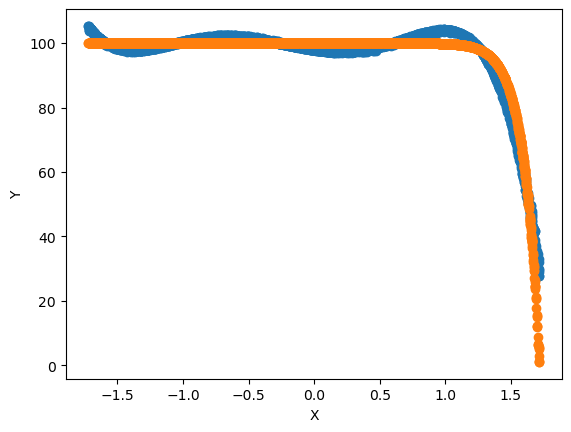

In [111]:
# x_train_reshaped=(X_train[:,0]).reshape(1,-1)
plt.scatter(X_train[:,0],regression.predict(X_train_poly))
plt.scatter(X_train[:,0],y_train)
plt.xlabel('X')
plt.ylabel('Y')